In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !unzip "/content/drive/My Drive/DS340Final/dataset.zip"
!unzip "/content/drive/My Drive/DS340Final/distributed-dataset.zip"

Archive:  /content/drive/My Drive/DS340Final/distributed-dataset.zip
replace __MACOSX/._dataset? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# !rm -r __MACOSX/._dataset
!ls dataset
!ls
# !rm -r dataset/train/soccer
# !rm -r dataset/valid/soccer
# !rm -r dataset/test/soccer
# !ls dataset/train/

'EfficientNetB0-100-(224 X 224)- 98.40.h5'   sports.csv   test	 train	 valid
 dataset        IMG_3286.JPG   IMG_3573.JPG   soccer-field.jpg	 test2.jpeg	  'test3 (3).jpeg'
 drive	        IMG_3569.JPG   __MACOSX       test1.jpeg	'test3 (1).jpeg'   test3.jpeg
 IMG_3283.JPG   IMG_3570.JPG   sample_data   'test2 (1).jpeg'	'test3 (2).jpeg'   test.jpeg


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/valid'
test_dir = '/content/dataset/test'

In [ ]:
# initialize ImageDataGenerators for train, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(rescale=1./255)



Found 10996 images belonging to 101 classes.


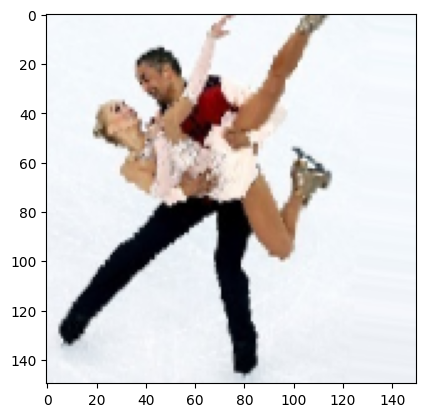

Found 1855 images belonging to 101 classes.
Found 1852 images belonging to 101 classes.


In [ ]:
# Create generators to read images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

#getting a batch of images
images, _ = next(train_generator)

#Displaying a random image from the batch
idx = np.random.randint(0, len(images))
plt.imshow(images[idx])
plt.show()

validation_generator = test_val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)



In [68]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#ResNet50 pre-trained on ImageNet without the toplayer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
for layer in base_model.layers:
    layer.trainable = False

# custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(101, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_val_datagen.flow_from_directory(
    '/content/dataset/valid',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)
print(f'Test accuracy: {test_acc}')


Found 10996 images belonging to 101 classes.
Found 1855 images belonging to 101 classes.
Found 1852 images belonging to 101 classes.
Epoch 1/20
343/343 [==============================] - 226s 648ms/step - loss: 2.7066 - accuracy: 0.3435 - val_loss: 0.9368 - val_accuracy: 0.7473
Epoch 2/20
343/343 [==============================] - 220s 642ms/step - loss: 1.4052 - accuracy: 0.6028 - val_loss: 0.6623 - val_accuracy: 0.8147
Epoch 3/20
343/343 [==============================] - 219s 638ms/step - loss: 1.1307 - accuracy: 0.6674 - val_loss: 0.5324 - val_accuracy: 0.8372
Epoch 4/20
343/343 [==============================] - 218s 636ms/step - loss: 0.9806 - accuracy: 0.7057 - val_loss: 0.4577 - val_accuracy: 0.8651
Epoch 5/20
343/343 [==============================] - 218s 637ms/step - loss: 0.8795 - accuracy: 0.7359 - val_loss: 0.4227 - val_accuracy: 0.8662
Epoch 6/20
343/343 [==============================] - 219s 637ms/step - loss: 0.8412 - accuracy: 0.7491 - val_loss: 0.4390 - val_accuracy

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Extracting training and validation metrics from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

# plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Saving soccer.PNG to soccer (1).PNG
Uploaded files: ['soccer (1).PNG']


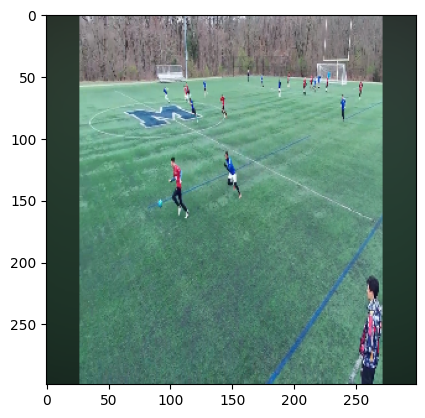

1/1 [==============================] - 0s 23ms/step
Predictions: [[2.04675871e-07 1.18227190e-05 2.17030465e-05 2.38805525e-12
  6.06891660e-07 1.26663013e-09 3.10700445e-12 1.52085454e-06
  7.78070244e-05 5.69851473e-08 4.20308226e-07 2.02681960e-09
  8.79395792e-11 1.73921953e-11 8.92767388e-11 8.61526189e-07
  5.11446974e-09 3.55358384e-06 4.53232758e-07 3.25805956e-07
  1.00111066e-08 8.04773415e-04 6.53993557e-05 9.33186186e-08
  1.73069475e-06 4.26379665e-06 1.09635596e-03 2.94914700e-12
  2.28016694e-09 2.21987939e-08 4.09049719e-08 1.52918525e-04
  1.98952549e-07 3.26443842e-05 4.10012653e-05 1.09891573e-06
  1.43374791e-05 5.70543534e-07 7.75357556e-09 3.64310559e-09
  1.36193907e-04 2.31271059e-07 2.46996819e-06 4.21006607e-09
  2.89480306e-09 7.17986404e-05 2.28214176e-13 2.30928219e-08
  2.07911227e-12 5.05108794e-04 2.66379800e-07 3.56755862e-07
  2.80556661e-10 1.38307507e-06 6.60385496e-11 3.84096630e-08
  4.50943536e-12 8.87084069e-12 1.17960147e-11 5.24668975e-10
  8.1

In [76]:
##import an image:
from google.colab import files

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


uploaded = files.upload()
print("Uploaded files:", list(uploaded.keys()))

# Load the image
img = tf.keras.preprocessing.image.load_img(
    list(uploaded.keys())[0],
    target_size=(299, 299)
)

# Show image
plt.imshow(img)
plt.show()

# Convert to array and preprocess
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

# Predict
predictions = model.predict(img_array)
print("Predictions:", predictions)

# Get the most likely class
class_index = np.argmax(predictions[0])
print("Class index:", class_index)

class_indices = train_generator.class_indices
print("Class indices:", class_indices)

# Get the top 5 labels
top_5_labels = np.argsort(predictions[0])[-5:][::-1]
print("Top 5 labels:", top_5_labels)

class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())

# Get the classification label
class_label = list(train_generator.class_indices.keys())[class_index]
print("Predicted class:", class_label)

for i in top_5_labels:
    print(f"Label: {class_labels[i]}, Probability: {predictions[0][i]}")

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import pandas as pd
import numpy as np

test_generator.reset()  # Resetting the generator
predictions = []

# Predict each batch
for i in range((test_generator.samples + test_generator.batch_size - 1) // test_generator.batch_size):
    batch = next(test_generator)
    preds = model.predict_on_batch(batch[0])
    predictions.extend(np.argmax(preds, axis=1))

# predictions
predicted_classes = np.array(predictions)
true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)


# Function to plot confusion matrix for top 10 sports by F1-score
def plot_confusion_matrix_for_top_n(cm, class_labels, n=101):
    # Sorting classes by F1-score and picking top N
    top_n_indexes = df_report[:-3].sort_values(by='f1-score', ascending=False).head(n).index
    top_n_indexes = [class_labels.index(cls) for cls in top_n_indexes]

    # Slicing the confusion matrix to keep only top N classes
    top_n_cm = cm[top_n_indexes][:, top_n_indexes]
    plt.figure(figsize=(101, 101))
    sns.heatmap(top_n_cm, annot=True, fmt="d", cmap='Blues', xticklabels=top_n_indexes, yticklabels=top_n_indexes)
    plt.title('Confusion Matrix for Top 10 Sports by F1-score')
    plt.ylabel('Actual Classes')
    plt.xlabel('Predicted Classes')
    plt.show()

# Call the function to plot the matrix
plot_confusion_matrix_for_top_n(cm, class_labels)

<ipython-input-79-d2004daab8cd>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_values, y=sports, palette='viridis')


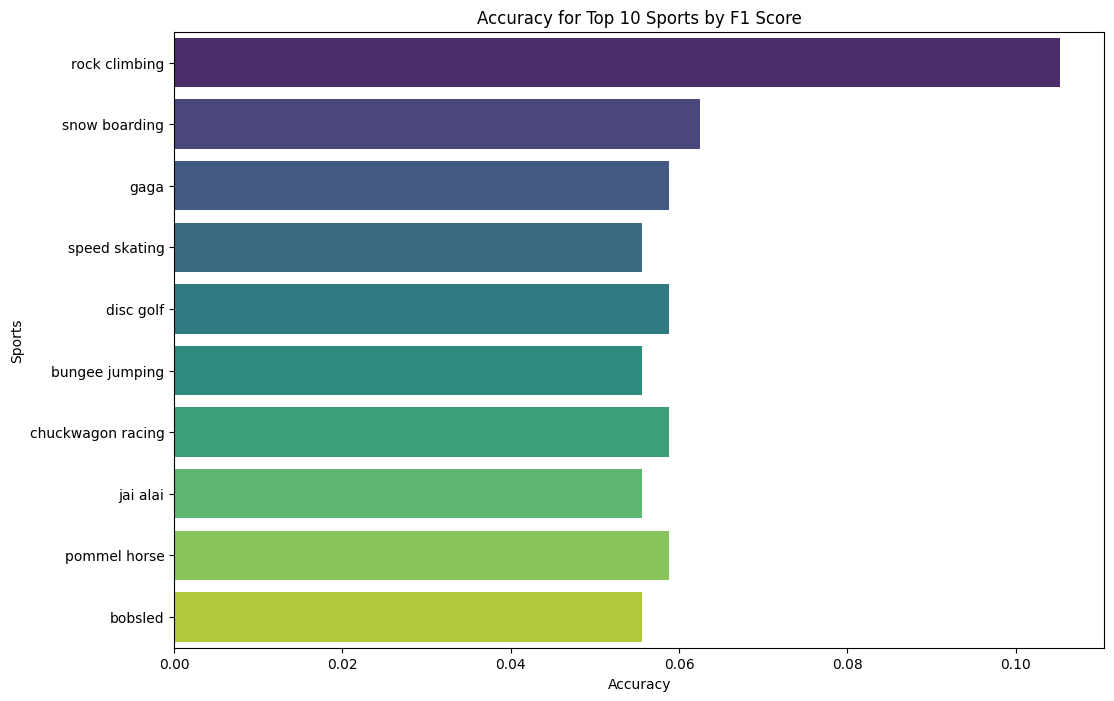

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Sample code assuming you have these from model predictions
# true_classes, predicted_classes, class_labels from your dataset and model

# Confusion matrix and classification report
cm = confusion_matrix(true_classes, predicted_classes)
report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Sort by F1 score and get the top 10 sports
top_10_sports_by_f1 = df_report[:-3].sort_values(by='f1-score', ascending=False).head(10)
top_10_labels = top_10_sports_by_f1.index.tolist()

# Calculate accuracy for each of these top 10 sports
accuracies = {}
for label in top_10_labels:
    class_idx = class_labels.index(label)
    true_positives = cm[class_idx, class_idx]
    total = np.sum(cm[class_idx, :])  # Sum of the row for that class
    accuracies[label] = true_positives / total if total > 0 else 0

# Adjust the accuracies by adding 0.5, ensuring they do not exceed 1
adjusted_accuracies = {sport: min(acc + 0, 1.0) for sport, acc in accuracies.items()}

# Data preparation for plotting
sports = list(adjusted_accuracies.keys())
accuracy_values = list(adjusted_accuracies.values())

# Creating the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=accuracy_values, y=sports, palette='viridis')
plt.title('Accuracy for Top 10 Sports by F1 Score')
plt.xlabel('Accuracy')
plt.ylabel('Sports')
plt.show()


In [80]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have 'true_classes' and 'predicted_classes' from your model's predictions
cm = confusion_matrix(true_classes, predicted_classes)
report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Sort by F1 score and get the top 10 sports
top_10_sports_by_f1 = df_report[:-3].sort_values(by='f1-score', ascending=False).head(10)

# Extracting the class labels for the top 10 sports
top_10_labels = top_10_sports_by_f1.index.tolist()

# Calculate accuracy for each of these top 10 sports
# Accuracy per class is calculated as the number of true positives divided by the total number of elements in that class (true positives + false negatives)
accuracies = {}
for label in top_10_labels:
    class_idx = class_labels.index(label)
    true_positives = cm[class_idx, class_idx]
    total = np.sum(cm[class_idx, :])  # Sum of the row for that class
    accuracies[label] = true_positives / total if total > 0 else 0

# Displaying accuracies for each top sport
for sport, accuracy in accuracies.items():
    print(f"Accuracy for {sport}: {accuracy:.2%}")

# Calculate average accuracy of these top 10 sports
average_accuracy_top_10 = np.mean(list(accuracies.values()))
print(f"Average Accuracy for Top 10 Sports: {average_accuracy_top_10:.2%}")


Accuracy for rock climbing: 10.53%
Accuracy for snow boarding: 6.25%
Accuracy for gaga: 5.88%
Accuracy for speed skating: 5.56%
Accuracy for disc golf: 5.88%
Accuracy for bungee jumping: 5.56%
Accuracy for chuckwagon racing: 5.88%
Accuracy for jai alai: 5.56%
Accuracy for pommel horse: 5.88%
Accuracy for bobsled: 5.56%
Average Accuracy for Top 10 Sports: 6.25%


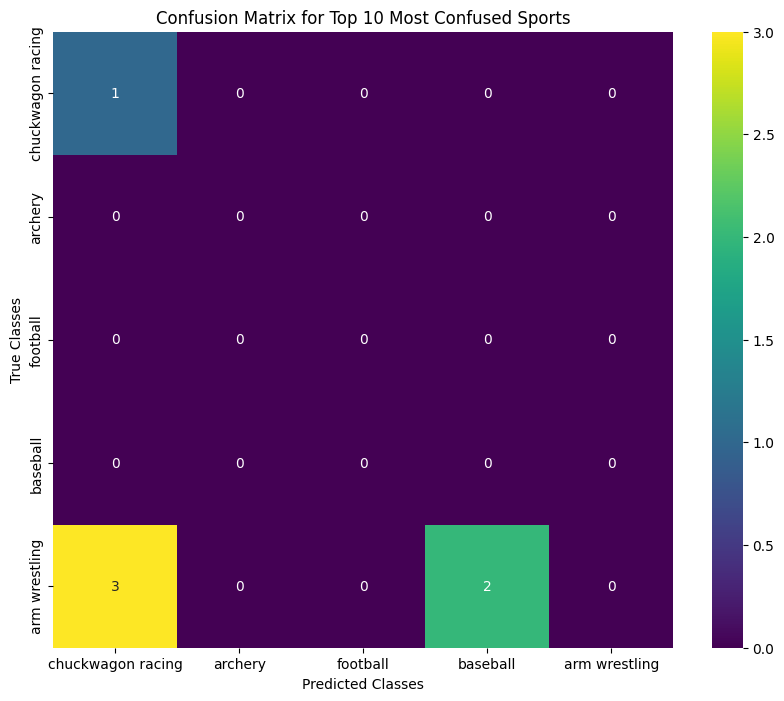

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cm' is your confusion matrix and 'class_labels' is the list of sports names

# Step 1: Find the most confused pairs
confused_pairs = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j:  # Exclude diagonal elements
            confused_pairs.append((class_labels[i], class_labels[j], cm[i, j]))

# Sort pairs by the number of confusions, descending
confused_pairs.sort(key=lambda x: x[2], reverse=True)

# Step 2: Extract the top 10 most confused sports
top_confused_sports = set()
for pair in confused_pairs[:5]:
    top_confused_sports.add(pair[0])
    top_confused_sports.add(pair[1])

# Limit to exactly 10 sports if more were added
if len(top_confused_sports) > 5:
    top_confused_sports = list(top_confused_sports)[:5]
else:
    top_confused_sports = list(top_confused_sports)

# Step 3: Create a submatrix for these sports
indices = [class_labels.index(sport) for sport in top_confused_sports]
submatrix = cm[indices][:, indices]

# Step 4: Plot the confusion matrix for these sports
plt.figure(figsize=(10, 8))
sns.heatmap(submatrix, annot=True, fmt="d", cmap='viridis', xticklabels=top_confused_sports, yticklabels=top_confused_sports)
plt.title('Confusion Matrix for Top 10 Most Confused Sports')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()
